### Data Description
This dataset contains the **top 1000 questions** asked on **AskReddit**, created by reddit user P_S_laplace. It contains 5 features: Title, Score, Gold, NumComs and NSFW. The dataset is shared as a Google Spreasheet on Google Drive.
[Link](http://www.datasets.co/dataset/56841e8a13565a030058bcf7)

**Method One**

Read .csv file using csv library:

In [2]:
import csv
f = open('2015-data.csv')
csvreader = csv.reader(f)
posts = list(csvreader)

Look through the first 5 lines:

In [5]:
posts[0:5]

[['Title', 'Score', 'Time', 'Gold', 'NumComs', 'NSFW'],
 ['What\'s your internet "white whale", something you\'ve been searching for years to find with no luck?',
  '11510',
  '1433213314.0',
  '1',
  '26195',
  'False'],
 ["What's your favorite video that is 10 seconds or less?",
  '8656',
  '1434205517.0',
  '4',
  '8479',
  'False'],
 ['What are some interesting tests you can take to find out about yourself?',
  '8480',
  '1443409636.0',
  '1',
  '4055',
  'False'],
 ["PhD's of Reddit. What is a dumbed down summary of your thesis?",
  '7927',
  '1440188623.0',
  '0',
  '13201',
  'False']]

We have to delete the first line because its the column name.

In [6]:
posts = posts[1:]
posts[0:5]

[['What\'s your internet "white whale", something you\'ve been searching for years to find with no luck?',
  '11510',
  '1433213314.0',
  '1',
  '26195',
  'False'],
 ["What's your favorite video that is 10 seconds or less?",
  '8656',
  '1434205517.0',
  '4',
  '8479',
  'False'],
 ['What are some interesting tests you can take to find out about yourself?',
  '8480',
  '1443409636.0',
  '1',
  '4055',
  'False'],
 ["PhD's of Reddit. What is a dumbed down summary of your thesis?",
  '7927',
  '1440188623.0',
  '0',
  '13201',
  'False'],
 ['What is cool to be good at, yet uncool to be REALLY good at?',
  '7711',
  '1440082910.0',
  '0',
  '20325',
  'False']]

Reformatting time from string to [datetime object](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior):

In [7]:
import datetime
for row in posts:
    row[2] = float(row[2])
    row[2] = datetime.datetime.fromtimestamp(row[2])
    
posts[0:2]

[['What\'s your internet "white whale", something you\'ve been searching for years to find with no luck?',
  '11510',
  datetime.datetime(2015, 6, 1, 22, 48, 34),
  '1',
  '26195',
  'False'],
 ["What's your favorite video that is 10 seconds or less?",
  '8656',
  datetime.datetime(2015, 6, 13, 10, 25, 17),
  '4',
  '8479',
  'False']]

To count how many posts were posted in March:

In [9]:
march_count = 0
for row in posts:
    if row[2].month==3:
        march_count += 1

print 'There are %.1f posted in March' %march_count

There are 66.0 posted in March


Formating time:

In [10]:
march3 = datetime.datetime(year = 2010, month = 3, day = 3)
print march3

pretty_march3 = march3.strftime("%b %d, %Y")
print pretty_march3

2010-03-03 00:00:00
Mar 03, 2010


Parsing time:

In [11]:
March3 = datetime.datetime.strptime(pretty_march3, '%b %d, %Y')
print March3

2010-03-03 00:00:00


#### Method Two

**1.Read the csv file by pandas:**

In [12]:
import pandas as pd

data = pd.read_csv('2015-data.csv')
data.head()

,Title,Score,Time,Gold,NumComs,NSFW
0,"What's your internet ""white whale"", something ...",11510,1.433213e+09,1,26195,False
1,What's your favorite video that is 10 seconds ...,8656,1.434206e+09,4,8479,False
2,What are some interesting tests you can take t...,8480,1.443410e+09,1,4055,False
3,PhD's of Reddit. What is a dumbed down summary...,7927,1.440189e+09,0,13201,False
4,"What is cool to be good at, yet uncool to be R...",7711,1.440083e+09,0,20325,False


In [17]:
print data.shape

(1000, 6)


**2.Reformatting time from string to [datetime object](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior):**

In [18]:
def reformat_time(x):
    x = float(x)
    return datetime.datetime.fromtimestamp(x)

data['Time'] = data['Time'].apply(reformat_time)
data.head()

,Title,Score,Time,Gold,NumComs,NSFW
0,"What's your internet ""white whale"", something ...",11510,2015-06-01 22:48:34,1,26195,False
1,What's your favorite video that is 10 seconds ...,8656,2015-06-13 10:25:17,4,8479,False
2,What are some interesting tests you can take t...,8480,2015-09-27 23:07:16,1,4055,False
3,PhD's of Reddit. What is a dumbed down summary...,7927,2015-08-21 16:23:43,0,13201,False
4,"What is cool to be good at, yet uncool to be R...",7711,2015-08-20 11:01:50,0,20325,False


**3.To count how many posts were posted in March:**

In [41]:
def count_march(x):
    new_x = x.to_datetime() # convert timestamp to datetime;
    count_m = 0
    if new_x.month == 3:
        count_m += 1
    return count_m

sum(data['Time'].apply(count_march))

66

**4.To look through the distribution of posts over month:**

In [42]:
def add_month(x):
    new_x = x.to_datetime() # convert timestamp to datetime;
    return new_x.month

data['MONTH'] = data['Time'].apply(add_month)
data.head()

,Title,Score,Time,Gold,NumComs,NSFW,MONTH
0,"What's your internet ""white whale"", something ...",11510,2015-06-01 22:48:34,1,26195,False,6
1,What's your favorite video that is 10 seconds ...,8656,2015-06-13 10:25:17,4,8479,False,6
2,What are some interesting tests you can take t...,8480,2015-09-27 23:07:16,1,4055,False,9
3,PhD's of Reddit. What is a dumbed down summary...,7927,2015-08-21 16:23:43,0,13201,False,8
4,"What is cool to be good at, yet uncool to be R...",7711,2015-08-20 11:01:50,0,20325,False,8


In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

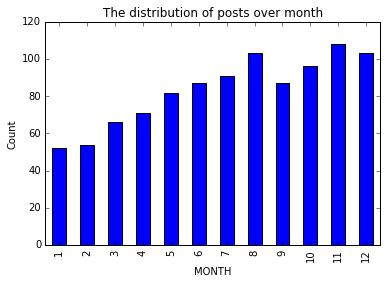

In [47]:
data.groupby(by = 'MONTH')['Title'].count().plot(kind = 'bar')
plt.ylabel('Count')
plt.title('The distribution of posts over month')

**5.Which post got the most comment and what about its content?**

In [50]:
max_comment = data[data['NumComs'] == max(data['NumComs'])]
max_comment

,Title,Score,Time,Gold,NumComs,NSFW,MONTH
89,"What is a non-racist, non-sexist, and non ""hat...",5550,2015-08-07 07:47:21,1,58822,False,8


In [57]:
# Using .values to get the content of a Series!!!
max_comment['Title'].values[0]

'What is a non-racist, non-sexist, and non "hateful" opinion you have that would make people dislike you?'

**6.Which post got the highest score?**

In [58]:
highest_score = data[data['Score'] == max(data['Score'])]
highest_score

,Title,Score,Time,Gold,NumComs,NSFW,MONTH
0,"What's your internet ""white whale"", something ...",11510,2015-06-01 22:48:34,1,26195,False,6


In [59]:
highest_score['Title'].values[0]

'What\'s your internet "white whale", something you\'ve been searching for years to find with no luck?'

**7.There are many titles contain the 'Serious' word. So how many title have it? Can you list some of them?**

In [65]:
def convert_typing(x):
    import re
    x = re.sub('[\[\(][Ss]erious[\]\)]', '[Serious]', x)
    return x

data['Title'] = data['Title'].apply(convert_typing)

data.ix[24] 
# Line 24: (Serious) --> [Serious]

Title      [Serious] People of Reddit who have HIV/AIDS, ...
Score                                                   6472
Time                                     2015-08-10 09:36:59
Gold                                                       0
NumComs                                                 4296
NSFW                                                   False
MONTH                                                      8
Name: 24, dtype: object

In [85]:
import re
count_type = 0 # to count
content =list() # to record title content
content_index = list() # to record index

for i in range(0,data.shape[0]):
    if re.search('\[Serious\]', data['Title'].values[i]) != None:
        content.append(data['Title'].values[i])
        count_type += 1
        content_index.append(i)
        
print 'There are %d "Serious" in the top 1000 posts.' %(count_type)

There are 101 "Serious" in the top 1000 posts.


In [82]:
# To list some titles have 'Serious'
content[0:5]

['[Serious] Redditors currently in a relationship, besides dinner and a movie, what are your favorite activities for date night?',
 '[Serious] At the end of a job interview when they ask me, "So, do you have any questions?", what are some genuinely good questions to ask?',
 'What is that one trick that "they" really don\'t want you to know? [Serious]',
 '[Serious] Redditors who want Trump to become president, why?',
 '[Serious] People of Reddit who have HIV/AIDS, when did you realize something was wrong?']

In [98]:
data_serious = data.ix[content_index]
data_serious.head()

,Title,Score,Time,Gold,NumComs,NSFW,MONTH
5,[Serious] Redditors currently in a relationshi...,7598,2015-08-19 10:08:00,2,5389,False,8
13,[Serious] At the end of a job interview when t...,7133,2015-05-08 01:40:58,1,5850,False,5
18,"What is that one trick that ""they"" really don'...",6701,2015-10-14 13:48:47,0,17724,False,10
22,[Serious] Redditors who want Trump to become p...,6526,2015-08-09 12:44:45,0,14580,False,8
24,"[Serious] People of Reddit who have HIV/AIDS, ...",6472,2015-08-10 09:36:59,0,4296,False,8


**8.Whether "Serious" can affect the number of comment?**

In [105]:
Total_comment = list([sum(data_serious['NumComs']),sum(data['NumComs']) - sum(data_serious['NumComs'])])

from __future__ import division
Total_comment = Total_comment / sum(data['NumComs'])
Total_comment

array([ 0.07382148,  0.92617852])

(0.8, 1.8)

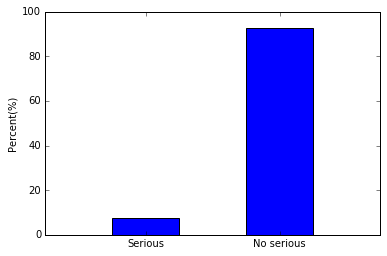

In [121]:
plt.bar([1,1.4], Total_comment*100, width=0.2)
plt.xticks([1.1,1.5], ['Serious','No serious'])
plt.ylabel('Percent(%)')
plt.xlim([0.8,1.8])

Although, you add "Serious" in your title, it doesn't mean you can get more comments. The number of commnents should be impacted by your content.